In [86]:
# 패키지 임포트
import numpy as np
import pandas as pd
import scipy.stats as ss
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
# !pip install plotly
# import plotly.offline as off
# import plotly.graph_objs as go
pd.set_option('display.max_columns', 500)

plt.rc("font", family="Malgun Gothic") # matplotlib 한글깨짐 방지

In [87]:
hospital_data = pd.read_csv('병원_2017.csv')

In [88]:
hospital_data

,구,동,종합병원 병원수,종합병원 병상수,일반병원 병원수,일반병원 병상수
0,종로구,사직동,0,0,0,0
1,종로구,삼청동,0,0,1,30
2,종로구,부암동,0,0,0,0
3,종로구,평창동,0,0,1,123
4,종로구,무악동,1,218,0,0
...,...,...,...,...,...,...
419,강동구,둔촌1동,0,0,0,0
420,강동구,둔촌2동,1,965,0,0
421,강동구,암사1동,0,0,0,0
422,강동구,천호2동,0,0,1,32


In [89]:
pop_data = pd.read_csv('서울동인구.csv')

In [90]:
pop_data

,구,동,인구
0,종로구,사직동,9645
1,종로구,삼청동,2764
2,종로구,부암동,9852
3,종로구,평창동,18336
4,종로구,무악동,8334
...,...,...,...
421,강동구,천호2동,33969
422,강동구,길동,46047
423,강동구,강일동,32700
424,강동구,상일1동,39036


In [91]:
data = pd.merge(hospital_data, pop_data, how='inner', on='동')

<AxesSubplot:>

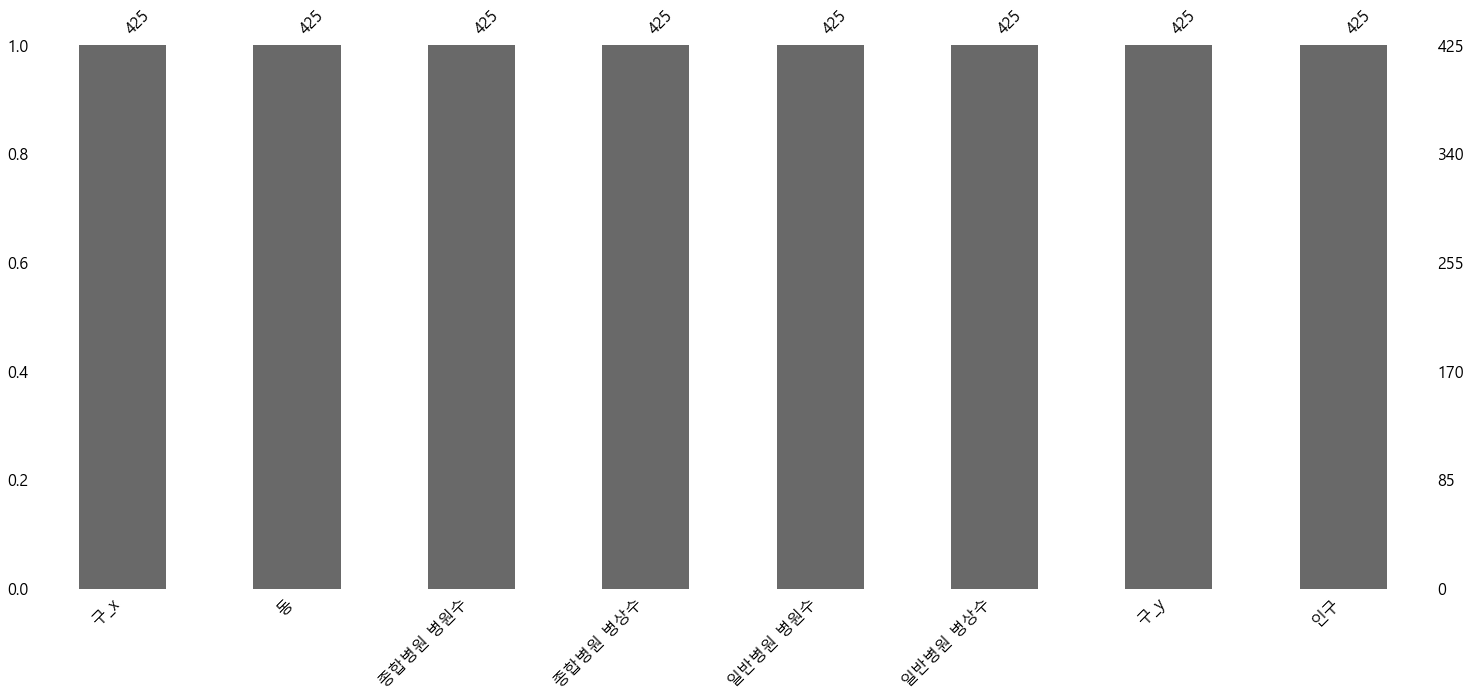

In [92]:
import missingno
missingno.bar(data)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 424
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구_x       425 non-null    object
 1   동         425 non-null    object
 2   종합병원 병원수  425 non-null    int64 
 3   종합병원 병상수  425 non-null    int64 
 4   일반병원 병원수  425 non-null    int64 
 5   일반병원 병상수  425 non-null    int64 
 6   구_y       425 non-null    object
 7   인구        425 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 29.9+ KB


In [94]:
data.drop('구_x', axis=1, inplace=True)
data.drop('구_y', axis=1, inplace=True)

In [95]:
data

,동,종합병원 병원수,종합병원 병상수,일반병원 병원수,일반병원 병상수,인구
0,사직동,0,0,0,0,9645
1,삼청동,0,0,1,30,2764
2,부암동,0,0,0,0,9852
3,평창동,0,0,1,123,18336
4,무악동,1,218,0,0,8334
...,...,...,...,...,...,...
420,둔촌1동,0,0,0,0,145
421,둔촌2동,1,965,0,0,24847
422,암사1동,0,0,0,0,34916
423,천호2동,0,0,1,32,33969


In [97]:
data['전체병상수'] = data['종합병원 병상수'] + data['일반병원 병상수']

In [99]:
data['대형병원병상률'] = data['전체병상수'] / data['인구']

In [101]:
data.describe()

,종합병원 병원수,종합병원 병상수,일반병원 병원수,일반병원 병상수,인구,전체병상수,대형병원병상률
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,0.131765,76.263529,0.517647,42.202353,22921.247059,118.465882,0.006050
std,0.358920,282.928455,0.956751,83.431400,8956.339365,294.345708,0.018815
min,0.000000,0.000000,0.000000,0.000000,145.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,16881.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,22406.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,58.000000,27577.000000,92.000000,0.004513
max,2.000000,2704.000000,6.000000,642.000000,56236.000000,2704.000000,0.228711


In [105]:
hospital_data = data[['동','종합병원 병원수', '일반병원 병원수', '대형병원병상률']]

In [106]:
hospital_data

,동,종합병원 병원수,일반병원 병원수,대형병원병상률
0,사직동,0,0,0.000000
1,삼청동,0,1,0.010854
2,부암동,0,0,0.000000
3,평창동,0,1,0.006708
4,무악동,1,0,0.026158
...,...,...,...,...
420,둔촌1동,0,0,0.000000
421,둔촌2동,1,0,0.038838
422,암사1동,0,0,0.000000
423,천호2동,0,1,0.000942
